# Notebook for Tests and Quick Looks

In [1]:
import xarray as xr
import cmocean as cmo

from datetime import datetime, timedelta

import numpy as np

import parcels

import cartopy.crs as ccrs
import cartopy.feature as cfeature

import matplotlib.pyplot as plt


In [5]:
import requests

url = "https://ns9081k.hyrax.sigma2.no/opendap/S800/norseas_800m_avg.nc4_2005010112"
local_filename = "norseas_800m_avg_2005010112.nc"

# Stream download
with requests.get(url, stream=True) as r:
    r.raise_for_status()
    with open(local_filename, 'wb') as f:
        for chunk in r.iter_content(chunk_size=8192):
            f.write(chunk)

# Now open it with xarray
import xarray as xr
print(f"Downloaded {local_filename} from {url}")
ds = xr.open_dataset(local_filename)
print(ds)

Downloaded norseas_800m_avg_2005010112.nc from https://ns9081k.hyrax.sigma2.no/opendap/S800/norseas_800m_avg.nc4_2005010112
<xarray.Dataset> Size: 2GB
Dimensions:      (ocean_time: 1, s_rho: 35, s_w: 36, eta_rho: 1151,
                  xi_rho: 1301, eta_u: 1151, xi_u: 1300, eta_v: 1150, xi_v: 1301)
Coordinates:
  * ocean_time   (ocean_time) datetime64[ns] 8B 2005-01-01T12:00:00
  * s_rho        (s_rho) float64 280B -0.9857 -0.9571 ... -0.04286 -0.01429
  * s_w          (s_w) float64 288B -1.0 -0.9714 -0.9429 ... -0.02857 0.0
    lon_rho      (eta_rho, xi_rho) float64 12MB ...
    lat_rho      (eta_rho, xi_rho) float64 12MB ...
    lon_u        (eta_u, xi_u) float64 12MB ...
    lat_u        (eta_u, xi_u) float64 12MB ...
    lon_v        (eta_v, xi_v) float64 12MB ...
    lat_v        (eta_v, xi_v) float64 12MB ...
Dimensions without coordinates: eta_rho, xi_rho, eta_u, xi_u, eta_v, xi_v
Data variables: (12/24)
    Vtransform   int32 4B ...
    Vstretching  int32 4B ...
    theta_s   

In [10]:
ds

<xarray.Dataset> Size: 2GB
Dimensions:      (ocean_time: 1, s_rho: 35, s_w: 36, eta_rho: 1151,
                  xi_rho: 1301, eta_u: 1151, xi_u: 1300, eta_v: 1150, xi_v: 1301)
Coordinates:
  * ocean_time   (ocean_time) datetime64[ns] 8B 2005-01-01T12:00:00
  * s_rho        (s_rho) float64 280B -0.9857 -0.9571 ... -0.04286 -0.01429
  * s_w          (s_w) float64 288B -1.0 -0.9714 -0.9429 ... -0.02857 0.0
    lon_rho      (eta_rho, xi_rho) float64 12MB ...
    lat_rho      (eta_rho, xi_rho) float64 12MB ...
    lon_u        (eta_u, xi_u) float64 12MB ...
    lat_u        (eta_u, xi_u) float64 12MB ...
    lon_v        (eta_v, xi_v) float64 12MB ...
    lat_v        (eta_v, xi_v) float64 12MB ...
Dimensions without coordinates: eta_rho, xi_rho, eta_u, xi_u, eta_v, xi_v
Data variables: (12/24)
    Vtransform   int32 4B ...
    Vstretching  int32 4B ...
    theta_s      float64 8B ...
    theta_b      float64 8B ...
    Tcline       float64 8B ...
    hc           float64 8B ...
    ...           ...
    ubar         (ocean_time, eta_u, xi_u) float64 12MB ...
    vbar         (ocean_time, eta_v, xi_v) float64 12MB ...
    u            (ocean_time, s_rho, eta_u, xi_u) float64 419MB ...
    v            (ocean_time, s_rho, eta_v, xi_v) float64 419MB ...
    temp         (ocean_time, s_rho, eta_rho, xi_rho) float64 419MB ...
    salt         (ocean_time, s_rho, eta_rho, xi_rho) float64 419MB ...
Attributes:
    history:      Created by roms2nc4single.py from ROMS output file
    institution:  Institute of Marine Research
    type:         ROMS/TOMS nonlinear model averages file
    title:        ROMS 3.5 - NorSeas-800m
    svn_url:      https://www.myroms.org/svn/omlab/branches/kate
    code_dir:     /work/users/jonal/NorROMS/ROMS_src/official/ROMS_kate
    CPP_options:  NORSEAS800M, ADD_FSOBC, ADD_M2OBC, ALBEDO, ATM_PRESS, ANA_B...

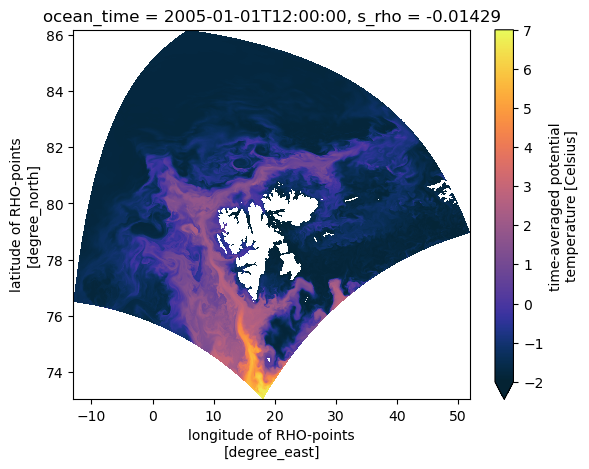

In [9]:
ds.isel(ocean_time=0, s_rho=-1).temp.plot(x="lon_rho", y="lat_rho", cmap=cmo.cm.thermal, vmin=-2, vmax=7)

In [ ]:
import xarray as xr

url = "https://ns9081k.hyrax.sigma2.no/opendap/S800/norseas_800m_avg_*"
ds = xr.open_mfdataset(url, engine='zarr')
print(ds)


OSError: no files to open

In [6]:
import xarray as xr

url = "https://ns9081k.hyrax.sigma2.no/opendap/S800/norseas_800m_avg.nc4_2005010112"

try:
    ds = xr.open_dataset(url)
    print(ds)
except Exception as e:
    print(f"Error opening dataset directly: {e}")

Error opening dataset directly: [Errno -90] NetCDF: file not found: 'https://ns9081k.hyrax.sigma2.no/opendap/S800/norseas_800m_avg.nc4_2005010112'


syntax error, unexpected WORD_WORD, expecting SCAN_ATTR or SCAN_DATASET or SCAN_ERROR
context: <!DOCTYPE^ html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd"><html xmlns="http://www.w3.org/1999/xhtml"><head> <meta http-equiv="Content-Type" content="text/html; charset=UTF-8"/> <link rel='stylesheet' href='/opendap/docs/css/contents.css' type='text/css'/> <title>Hyrax - Resource Not Found (404)</title></head><body><p align="left">&nbsp;</p><h1 align="center">Hyrax - Resource Not Found (404)</h1><hr align="left" size="1" noshade="noshade"/><table width="100%" border="0"> <tr> <td> <a href="/opendap/docs/images/largeEarth.jpg"> <img src="/opendap/docs/images/smallEarth.jpg" alt="I looked everywhere!" title="I looked everywhere!" border="0"/> </a> </td> <td> <p align="left">The URL requested does not describe a resource that can be found on this server.</p> <p align="left">If you would like to start at the top level of this server, 

In [2]:
url = "https://ns9081k.hyrax.sigma2.no/opendap/S800/norseas_800m_avg.nc4"
ds = xr.open_dataset(url)
print(ds)

NameError: name 'xr' is not defined

In [7]:
import xarray as xr
import requests
import numpy as np # Often useful for numerical operations
import matplotlib.pyplot as plt # For optional visualization

In [ ]:
# The OPeNDAP URL you provided
opendap_url = 'https://ns9081k.hyrax.sigma2.no/opendap/S800/'

print(f"Attempting to load data from: {opendap_url}")

# --- Preliminary HTTP check for basic reachability ---
try:
    # Use requests.head for a lightweight check, setting a timeout
    response = requests.head(opendap_url, timeout=10)
    response.raise_for_status() # Raise an HTTPError for bad responses (4xx or 5xx)
    print(f"HTTP check successful: Status Code {response.status_code}")
except requests.exceptions.RequestException as e:
    print(f"Preliminary HTTP check failed: {e}")
    print("This indicates a network or server issue. The OPeNDAP endpoint might be down or the URL is incorrect.")
    print("Aborting xarray open_dataset attempt.")
    exit() # Exit if the URL is not reachable at all

Attempting to load data from: https://ns9081k.hyrax.sigma2.no/opendap/S800/
Preliminary HTTP check failed: 405 Client Error:  for url: https://ns9081k.hyrax.sigma2.no/opendap/S800/
This indicates a network or server issue. The OPeNDAP endpoint might be down or the URL is incorrect.
Aborting xarray open_dataset attempt.


: 

In [9]:
ds = None # Initialize ds to None
try:
    # Attempt to open the dataset with explicit engine and decoding options
    ds = xr.open_dataset(opendap_url, engine="pydap", decode_times=False)
    print("\nDataset opened successfully with xarray.")
except Exception as e:
    print(f"\nError opening dataset with xarray: {e}")
    print("This could be due to a malformed dataset, authentication issues, or deeper server problems.")
    # In a real application, one might log the error and proceed with alternative actions

/albedo/home/quraus001/miniforge3/envs/parcels/lib/python3.13/site-packages/pydap/handlers/dap.py:134: UserWarning: PyDAP was unable to determine the DAP protocol defaulting to DAP2. DAP2 is consider legacy and may result in slower responses. 
Consider replacing `http` in your `url` with either `dap2` or `dap4` to specify the DAP protocol (e.g. `dap2://<data_url>` or `dap4://<data_url>`).  For more 
information, go to https://www.opendap.org/faq-page.
  warnings.warn(



Error opening dataset with xarray: '<class 'pydap.model.BaseType'>' object has no attribute 'dimensions'
This could be due to a malformed dataset, authentication issues, or deeper server problems.


In [14]:
# convert to float32
for var in ['temp', 'salt', 'u', 'v', 'depth']:
    ds[var] = ds[var].astype(np.float32)
# Save the modified dataset
ds.to_netcdf("/albedo/work/user/quraus001/processed_data/gridded/Arc40.2002.oce.mean.sub_gridded_withdepth_float.nc")

In [13]:
ds

<xarray.Dataset> Size: 4GB
Dimensions:  (depth: 1, time: 365, lat: 825, lon: 800)
Coordinates:
  * time     (time) object 3kB 2002-01-01 23:57:30 ... 2002-12-31 23:57:30
  * lat      (lat) float64 7kB 75.0 75.01 75.02 75.03 ... 82.47 82.48 82.49 82.5
  * lon      (lon) float64 6kB -20.0 -19.95 -19.9 -19.85 ... 19.9 19.95 20.0
  * depth    (depth) float64 8B 0.0
Data variables:
    temp     (depth, time, lat, lon) float32 964MB nan -1.731 ... -1.841 -1.841
    salt     (depth, time, lat, lon) float32 964MB nan 31.71 ... 33.59 33.59
    u        (depth, time, lat, lon) float32 964MB nan 0.01576 ... -0.01223
    v        (depth, time, lat, lon) float32 964MB nan 0.00879 ... 0.0401 0.0401

In [12]:
ds['temp'].attrs = {
    'units': 'degC',
    'long_name': 'Sea Surface Temperature',
    'standard_name': 'sea_surface_temperature'
}

ds['salt'].attrs = {
    'units': 'psu',
    'long_name': 'Sea Surface Salinity',
    'standard_name': 'sea_surface_salinity'
}

ds['u'].attrs = {
    'units': 'm/s',
    'long_name': 'Zonal Velocity',
    'standard_name': 'eastward_sea_water_velocity'
}

ds['v'].attrs = {
    'units': 'm/s',
    'long_name': 'Meridional Velocity',
    'standard_name': 'northward_sea_water_velocity'
}

# Add a depth coordinate with value 0 m
ds = ds.expand_dims({'depth': [0.0]})
ds = ds.assign_coords(depth=("depth", [0.0], {'units': 'm', 'long_name': 'depth'}))

# Move depth to correct position in dimensions: (time, depth, lat, lon)
for var in ['temp', 'salt', 'u', 'v']:
    ds[var] = ds[var].expand_dims('depth').transpose('time', 'depth', 'lat', 'lon')



ValueError: Dimension depth already exists.

In [11]:
ds

<xarray.Dataset> Size: 8GB
Dimensions:  (time: 365, lat: 825, lon: 800)
Coordinates:
  * time     (time) object 3kB 2002-01-01 23:57:30 ... 2002-12-31 23:57:30
  * lat      (lat) float64 7kB 75.0 75.01 75.02 75.03 ... 82.47 82.48 82.49 82.5
  * lon      (lon) float64 6kB -20.0 -19.95 -19.9 -19.85 ... 19.9 19.95 20.0
Data variables:
    temp     (time, lat, lon) float64 2GB ...
    salt     (time, lat, lon) float64 2GB ...
    u        (time, lat, lon) float64 2GB ...
    v        (time, lat, lon) float64 2GB ...

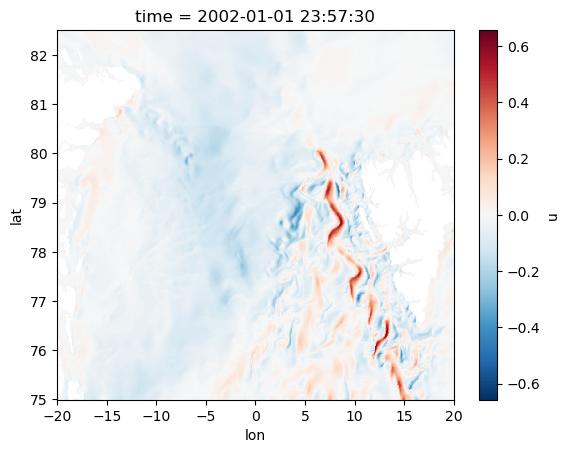

In [9]:
ds.u.isel(time=0).plot()

In [2]:
file = "/albedo/work/projects/oce_rio/cwekerle/result/Arc22_sub_daily/gridded_python/Arc22.gridded_100m_oce_2006_2009_new.nc"
ds = xr.open_dataset(file)

In [11]:
ds

<xarray.Dataset> Size: 39GB
Dimensions:      (time: 1460, latitude: 825, longitude: 800, depth_coord: 1)
Coordinates:
  * latitude     (latitude) float64 7kB 75.0 75.01 75.02 ... 82.48 82.49 82.5
  * longitude    (longitude) float64 6kB -20.0 -19.95 -19.9 ... 19.9 19.95 20.0
  * depth_coord  (depth_coord) float64 8B 100.0
  * time         (time) datetime64[ns] 12kB 2006-01-02 2006-01-03 ... 2010-01-01
Data variables:
    day          (time) float64 12kB ...
    thetao       (time, depth_coord, latitude, longitude) float64 8GB ...
    so           (time, depth_coord, latitude, longitude) float64 8GB ...
    uo           (time, depth_coord, latitude, longitude) float64 8GB ...
    vo           (time, depth_coord, latitude, longitude) float64 8GB ...
    zos          (time, latitude, longitude) float64 8GB ...
Attributes:
    history:                   Tue Sep 26 11:38:33 2017: ncap -O -s day=time/...
    nco_openmp_thread_number:  1

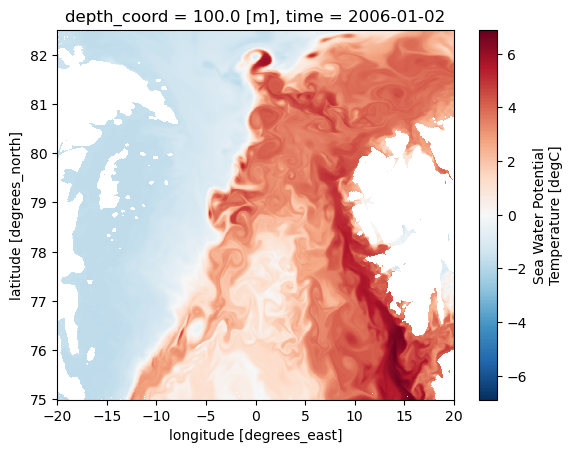

In [4]:
ds.thetao.isel(time=0).plot()

In [6]:
ds.uo.shape, ds.vo.shape, ds.thetao.shape

((1460, 1, 825, 800), (1460, 1, 825, 800), (1460, 1, 825, 800))

In [ ]:
inpath = "/albedo/work/projects/oce_rio/cwekerle/result/Arc22_sub_daily/gridded_python/"
file   = "Arc22.gridded_100m_oce_2006_2009_new.nc"
example_dataset_folder = inpath
fname = f"{example_dataset_folder}/Arc22.gridded_100m_oce_2006_2009_n*.nc"
filenames = {"U": fname, "V": fname}

In [ ]:
# In the GlobCurrent data the dimensions are also called 'lon', 'lat' and 'time
dimensions = {
    "U": {"lat": "lat", "lon": "lon", "time": "time"},
    "V": {"lat": "lat", "lon": "lon", "time": "time"},
}

In [5]:
filenames = {
    'U': inpath +file,
    'V': inpath +file,
    "T": inpath +file,
    "S": inpath +file,
}

variables = {
    'U': 'uo',
    'V': 'vo',
    "T": 'thetao',
    "S": 'so',
}



dimensions = {
    'lon': 'longitude',
    'lat': 'latitude',
    'time': 'time',
    'depth': 'depth_coord',
}

fieldset = parcels.FieldSet.from_netcdf(filenames, variables, dimensions, allow_time_extrapolation=True)

In [14]:
np.diff(ds.latitude)

array([0.00910194, 0.00910194, 0.00910194, 0.00910194, 0.00910194,
       0.00910194, 0.00910194, 0.00910194, 0.00910194, 0.00910194,
       0.00910194, 0.00910194, 0.00910194, 0.00910194, 0.00910194,
       0.00910194, 0.00910194, 0.00910194, 0.00910194, 0.00910194,
       0.00910194, 0.00910194, 0.00910194, 0.00910194, 0.00910194,
       0.00910194, 0.00910194, 0.00910194, 0.00910194, 0.00910194,
       0.00910194, 0.00910194, 0.00910194, 0.00910194, 0.00910194,
       0.00910194, 0.00910194, 0.00910194, 0.00910194, 0.00910194,
       0.00910194, 0.00910194, 0.00910194, 0.00910194, 0.00910194,
       0.00910194, 0.00910194, 0.00910194, 0.00910194, 0.00910194,
       0.00910194, 0.00910194, 0.00910194, 0.00910194, 0.00910194,
       0.00910194, 0.00910194, 0.00910194, 0.00910194, 0.00910194,
       0.00910194, 0.00910194, 0.00910194, 0.00910194, 0.00910194,
       0.00910194, 0.00910194, 0.00910194, 0.00910194, 0.00910194,
       0.00910194, 0.00910194, 0.00910194, 0.00910194, 0.00910

In [6]:
filenames = {
    'U': inpath +file,
    'V': inpath +file,
    "T": inpath +file,
    "S": inpath +file,
}

variables = {
    'U': 'uo',
    'V': 'vo',
    "T": 'thetao',
    "S": 'so',
}

dimensions = {
    'lon': 'longitude',
    'lat': 'latitude',
    'time': 'time',
    'depth': 'depth_coord',
}

fieldset = parcels.FieldSet.from_netcdf(
    filenames,
    variables,
    dimensions,
    indices={'depth': [0]},  # fixed 100m layer
    allow_time_extrapolation=True
)

In [7]:
def SampleT(particle, fieldset, time):
    particle.temperature = fieldset.T[time, particle.depth, particle.lat, particle.lon]

In [8]:
pset = parcels.ParticleSet.from_list(
    fieldset=fieldset,
    pclass=parcels.JITParticle,
    lon=[0.0],     # your test longitude
    lat=[79.0],    # your test latitude (within domain!)
    depth=[100.0]  # match the dataset's depth_coord
)


In [20]:
from parcels import AdvectionRK4  # even though we're doing 2D, 3D is safer here

pset.execute(
    AdvectionRK4,
    runtime=86400 * 5,   # 5 days in seconds
    dt=1800,             # simulation step: 30 min
    output_file=pset.ParticleFile(name="test_output", outputdt=86400)  # daily output
)

INFO: Output files are stored in test_output.zarr.
100%|██████████| 432000.0/432000.0 [00:01<00:00, 343032.33it/s]


In [21]:
pset.show(traj=True, show_time=True)

TypeError: 'bool' object is not callable

In [23]:
data_xarray = xr.open_zarr("test_output.zarr")
data_xarray

<xarray.Dataset> Size: 128B
Dimensions:     (trajectory: 1, obs: 5)
Coordinates:
  * obs         (obs) int32 20B 0 1 2 3 4
  * trajectory  (trajectory) int64 8B 1
Data variables:
    lat         (trajectory, obs) float32 20B dask.array<chunksize=(1, 1), meta=np.ndarray>
    lon         (trajectory, obs) float32 20B dask.array<chunksize=(1, 1), meta=np.ndarray>
    time        (trajectory, obs) datetime64[ns] 40B dask.array<chunksize=(1, 1), meta=np.ndarray>
    z           (trajectory, obs) float32 20B dask.array<chunksize=(1, 1), meta=np.ndarray>
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_kernels:        JITParticleAdvectionRK4
    parcels_mesh:           spherical
    parcels_version:        3.1.2

In [11]:
from parcels import AdvectionRK4  # even though we're doing 2D, 3D is safer here

# --- STEP 1: Set up your particle release locations ---
# Example: 10 particles along a line near lat=78.0

n = 20
lons = np.full(n, 3)        # adjust to match your domain              # all particles at lat 78.0
lats = np.linspace(78, 80, n)
depths = np.full(n, 100.0)           # all at 100m depth (fixed layer)

# --- STEP 2: Create the ParticleSet ---
SampleParticle = parcels.JITParticle.add_variable("temperature")


pset = parcels.ParticleSet.from_list(
    fieldset=fieldset,
    pclass=SampleParticle,#parcels.JITParticle,
    lon=lons,
    lat=lats,
    depth=depths
)

# --- STEP 3: Run the simulation for 14 days with 30-min timestep ---
pset.execute(
    [AdvectionRK4, SampleT],
    runtime=timedelta(days=30),             # 2 weeks total simulation
    dt=timedelta(minutes=30),               # simulation step
    output_file=pset.ParticleFile(name="parcels_output_T", outputdt=timedelta(days=1))
)

INFO: Output files are stored in parcels_output_T.zarr.
100%|██████████| 2592000.0/2592000.0 [00:14<00:00, 181578.42it/s]


In [15]:
ds = xr.open_zarr("parcels_output_T.zarr")
ds

<xarray.Dataset> Size: 15kB
Dimensions:      (trajectory: 20, obs: 30)
Coordinates:
  * obs          (obs) int32 120B 0 1 2 3 4 5 6 7 8 ... 22 23 24 25 26 27 28 29
  * trajectory   (trajectory) int64 160B 41 42 43 44 45 46 ... 55 56 57 58 59 60
Data variables:
    lat          (trajectory, obs) float32 2kB dask.array<chunksize=(20, 1), meta=np.ndarray>
    lon          (trajectory, obs) float32 2kB dask.array<chunksize=(20, 1), meta=np.ndarray>
    temperature  (trajectory, obs) float32 2kB dask.array<chunksize=(20, 1), meta=np.ndarray>
    time         (trajectory, obs) datetime64[ns] 5kB dask.array<chunksize=(20, 1), meta=np.ndarray>
    z            (trajectory, obs) float32 2kB dask.array<chunksize=(20, 1), meta=np.ndarray>
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_kernels:        NewParticleAdvectionRK4SampleT
    parcels_mesh:           spherical
    parcels_version:        3.1.2

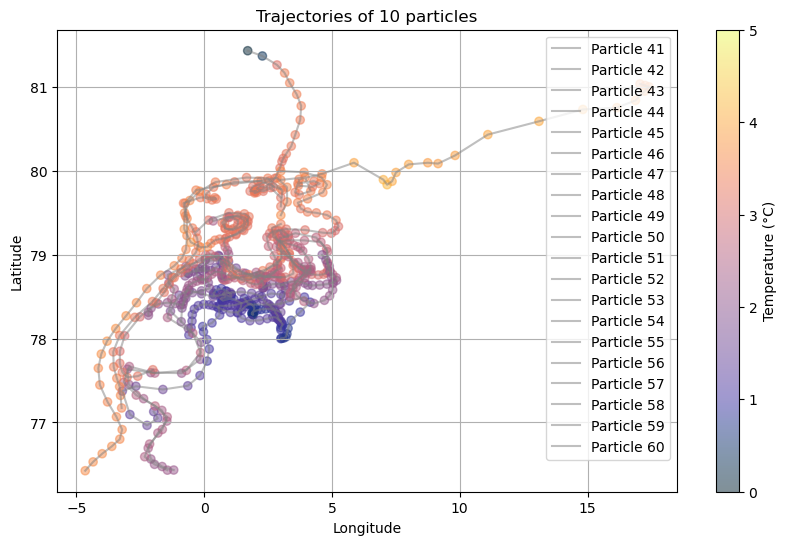

In [22]:
import matplotlib.pyplot as plt

ds = xr.open_zarr("parcels_output_T.zarr")

plt.figure(figsize=(10,6))
for pid in ds.trajectory:
    plt.plot(ds.lon.sel(trajectory=pid), ds.lat.sel(trajectory=pid), label=f"Particle {pid.values}", color="grey", alpha=0.5)
    plt.scatter(ds.lon.sel(trajectory=pid), ds.lat.sel(trajectory=pid), c=ds.temperature.sel(trajectory=pid), cmap=cmo.cm.thermal, alpha=0.5, vmin=0, vmax=5)
plt.colorbar(label="Temperature (°C)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Trajectories of 10 particles")
plt.legend()
plt.grid(True)
plt.show()

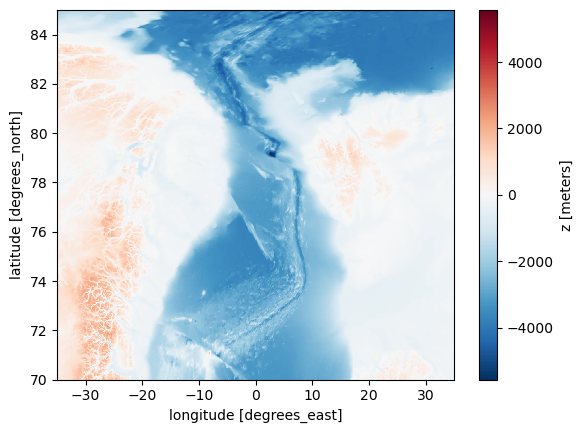

In [23]:
# Load ETOPO1
ds_bath = xr.open_dataset("/albedo/work/user/quraus001/bath/ETOPO_2022_v1_60s_N90W180_bed.nc")

# ETOPO1 uses 'x' and 'y' instead of lon/lat sometimes, and 'z' for depth

# Crop to Fram Strait region
ds_fram_bath = ds_bath.sel(
    lon=slice(-35, 35),    # longitude
    lat=slice(70, 85)      # latitude (note: decreasing!)
)

ds_fram_bath.z.plot()

In [24]:
def get_colormap_colors(colormap='plasma', num_colors=20):
    # Create a linear space of values from 0 to 1
    values = np.linspace(0, 1, num_colors)
    
    # Get the colormap
    cmap = plt.cm.get_cmap(colormap)
    
    # Get the colors corresponding to the values
    colors = [cmap(val) for val in values]
    
    return colors

/tmp/ipykernel_1766728/2998976094.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap(colormap)


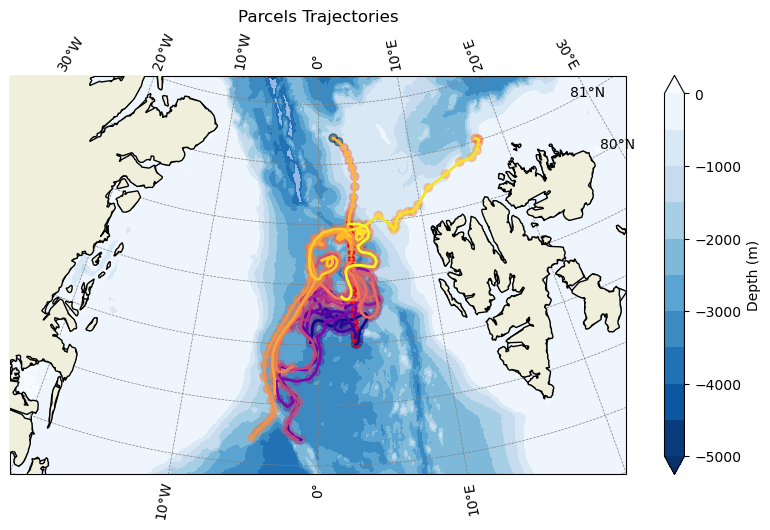

In [26]:
colors = get_colormap_colors(colormap='plasma', num_colors=20)

fig = plt.figure(figsize=(8, 6))
proj = ccrs.NorthPolarStereo()
ax = plt.axes(projection=proj)

# Set extent for Fram Strait (in degrees; note lat/lon in PlateCarree for setting extent)
ax.set_extent([-20, 20, 75, 82], crs=ccrs.PlateCarree())

# Plot the bathymetry
bathy_data = ds_fram_bath['z']
lon = ds_fram_bath['lon']
lat = ds_fram_bath['lat']

# Contourf or pcolormesh for bathymetry
cs = ax.contourf(
    lon, lat, bathy_data,
    levels=np.arange(-5000, 500, 500),
    cmap="Blues_r",
    extend='both',
    transform=ccrs.PlateCarree()
)

plt.colorbar(cs, ax=ax, orientation='vertical', label='Depth (m)', shrink=0.7)

# Add map features
ax.coastlines(resolution='50m')
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', linestyle='--')
ax.add_feature(cfeature.LAND, zorder=100, edgecolor='k')
ax.add_feature(cfeature.OCEAN)

# Plot each particle's trajectory
for pid, color in zip(ds.trajectory, colors):
    ax.plot(
        ds.lon.sel(trajectory=pid),
        ds.lat.sel(trajectory=pid),
        transform=ccrs.PlateCarree(),
        label=f"Particle {pid.values}",
        linewidth=2,
        color=color,
    )
    ax.scatter(ds.lon.sel(trajectory=pid), ds.lat.sel(trajectory=pid), c=ds.temperature.sel(trajectory=pid), cmap=cmo.cm.thermal, alpha=0.5, vmin=0, vmax=5, transform=ccrs.PlateCarree())


# Optional: mark starting locations
ax.scatter(
    ds.lon.isel(obs=0),
    ds.lat.isel(obs=0),
    color='red',
    s=20,
    transform=ccrs.PlateCarree(),
    label="Start",
    marker="x"
)

plt.title("Parcels Trajectories")
#plt.legend()
plt.tight_layout()
plt.show()